## 汉诺塔问题

- 在场地上有三根圆柱A，B，C，其中A上面串了n个圆盘，这些圆盘从上到下是按从小到大顺序排列的。
- 移动规则：每次移动一个圆盘，最终实现将所有圆盘移动到Ｃ上，大的圆盘任何时刻不得位于小的圆盘上面

In [3]:
import turtle
class Stack:  #面向对象定义一个类
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return len(self.items) == 0
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        if not self.isEmpty():
            return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)
    
def drawpole_3():  #这里是绘制三个塔柱子
    t = turtle.Turtle() # 绘图
    t.hideturtle()
    t.pencolor(0, 1, 1)
    def drawpole_1(k):
        t.up()
        t.pensize(10)
        t.speed(100)
        t.goto(400*(k-1), 300)
        t.down()
        t.goto(400*(k-1), -100)
        t.goto(400*(k-1)-20, -100)
        t.goto(400*(k-1)+20, -100)
    drawpole_1(0)
    drawpole_1(1)
    drawpole_1(2)
    
def creat_plates(n): #按照输入的n来画出盘子个数
    plates=[turtle.Turtle() for i in range(n)]
    for i in range(n):
        plates[i].up()
        plates[i].hideturtle()
        plates[i].shape("square")
        plates[i].shapesize(1,20-i)
        plates[i].goto(-400,-90+20*i)
        plates[i].showturtle()
    return plates

def pole_stack(): #这里运用栈来控制一次只能搬动一个盘子并且递归
    poles=[Stack() for i in range(3)]
    return poles

def moveDisk(plates,poles,fp,tp): #搬动盘子
    mov=poles[fp].peek()
    plates[mov].goto((fp-1)*400,300)
    plates[mov].goto((tp-1)*400,300)
    l=poles[tp].size()
    plates[mov].goto((tp-1)*400,-90+20*l)
    
def moveTower(plates,poles,height,fromPole, toPole, withPole): 
    if height >= 1:
        moveTower(plates,poles,height-1,fromPole,withPole,toPole)
        moveDisk(plates,poles,fromPole,toPole)
        poles[toPole].push(poles[fromPole].pop())
        moveTower(plates,poles,height-1,withPole,toPole,fromPole)
        
myscreen=turtle.Screen()
drawpole_3()
n=int(input("请输入汉诺塔的层数并回车确定:\n"))
plates=creat_plates(n)
poles=pole_stack()
for i in range(n):
    poles[0].push(i)    # n个盘子押入到栈中
moveTower(plates,poles,n,0,2,1)
myscreen.exitonclick()

请输入汉诺塔的层数并回车确定:
 4


## 找出a[0]......a[n]中的最大值和最小值
- 冒泡方法
    - 依次两两比较
    - 大（小）的数字后移
    - 取得最大、最小值
- 两两比较法
    - a[0]&a[1],a[2]&a[3]......两两比较
    - 得到n/2个最大值和最小值
    - 最大（小）值中再进行比较
    - 最大最小值与标志位进行比较
- 分治策略
    - 先分再和，分解为两个子问题，分别求最大最小值
    - 递归调用，分解成小问题
    - 合并求出最大最小值

In [13]:
import random

# 冒泡方法
def max_min1(n1):
    for i in range(len(n1)-1):
        if n1[i] > n1[i+1]:
            n1[i], n1[i+1] = n1[i+1], n1[i]
    print('\n冒泡方法  最大值为：' + str(n1[len(n1)-1]), end=' ')
    n1.pop(len(n1)-1)  # 最大值去除
    for j in range(len(n1)-1):
        if n1[j] < n1[j+1]:
            n1[j], n1[j+1] = n1[j+1], n1[j]
    print('最小值为：' + str(n1[len(n1)-1]))

    
# 两两比较法
'''
a[0]&a[1],a[2]&a[3]......两两比较
得到n/2个最大值和最小值

'''
def max_min2(n2):
    if n%2 == 0:    # 区分数字个数奇偶，设置最大值和最小值的标志位
        if n2[0] > n2[1]:
            nmax, nmin = n2[0], n2[1]
        else:
            nmax, nmin = n2[1], n2[0]
        i = 2
    else:
        nmax = nmin = n2[0]
        i = 1
    while i < len(n2)-1:
        if n2[i] > n2[i+1]:
            if n2[i] > nmax:
                nmax = n2[i]
            if n2[i+1] < nmin:
                nmin = n2[i+1]
        if n2[i] < n2[i+1]:
            if n2[i] < nmin:
                nmin = n2[i]
            if n2[i+1] > nmax:
                nmax = n2[i+1]
        i = i + 2    # 步长为2
    print('\n比较方法  最大值为：' + str(nmax) + '最小值为：' + str(nmin), end=' ')

# 分治策略
def max_min3(n3):
    def maxmin(l, low, high):
        if high - low <= 1:
            if l[low] < l[high]:
                return [l[high], l[low]]
            else:
                return [l[low], l[high]]
        mid = (low + high) // 2        # 选取分治的中点
        left_list = maxmin(l, low, mid)        # 调用递归
        right_list = maxmin(l, mid + 1, high)
        if left_list[0] > right_list[0]:        # 将左边的最大值和右边的最大值比较
            if left_list[1] > right_list[1]:            # 将左边的最小值和右边最小值比较
                return [left_list[0], right_list[1]]                # 返回列表[max,min]
            else:
                return [left_list[0], left_list[1]]
        else:
            if left_list[1] > right_list[1]:
                return [right_list[0], right_list[1]]
            else:
                return [right_list[0], left_list[1]]
    num = maxmin(n3, 0, len(n3) - 1)
    print('\n分治策略  最大值为：' + str(num[0]) + '最小值为：' + str(num[1]), end=' ')

n = int(input())
i = 0
numbers = []
while i < n:
    numbers.append(random.randint(0,100))
    i = i + 1
print("原list为：",numbers)    
# max_min1(numbers)  #冒泡法
# max_min2(numbers)  #两两比较法
max_min3(numbers)  #分治策略

 5


原list为： [46, 18, 52, 85, 26]

分治策略  最大值为：85最小值为：18 

## 计算a*b
- 考虑a,b的数据结构
- 模仿小学生计算
- a,b的数据结构均为list，每一位存储到list的每一个位置
- c的数据结构也为list，
- 64位python的限制是 2**60  1152921504606846976 个元素
![blockchain](chengfa.png)

In [4]:
str1 = input('输入第一个数字：')
str2 = input('输入第二个数字：')
a = []
b = []
result = [0]
k = 1
for i in str1:
    a.append(int(i))
for j in str2:
    b.append(int(j))
while k <= len(b):
    l = 1
    while l<= len(a):
        result.append(0)
        temp = a[-l] * b[-k]    # temp的值是两个乘数的对应两位相乘的结果，最小为0，最大为99
        result[l+k-2] =  result[l+k-2] + int(temp % 10)   #每一位的值是当前的值加上之前的进位（没考虑大于9向前一位进位）
        if result[l+k-2] > 9:    # 需要进位
            result[l+k-2] = result[l+k-2] - 10    
            result[l+k-1] = result[l+k-1] + int(temp/10) + 1
        else:
            result[l+k-1] = result[l+k-1] + int(temp/10)
        l = l + 1
    k = k + 1
m = 1
print("a * b的值为：", end=' ')
while m <= len(result):
    if result[-m] != 0:
        break
    m = m + 1
while m <= len(result):
    print(result[-m], end=' ')
    m = m + 1

输入第一个数字： 12345678909877
输入第二个数字： 234578923567


a * b的值为： 2 8 9 6 0 3 6 0 6 9 3 8 2 7 6 0 6 6 4 3 7 1 2 5 9 

## 实现二分查找
- 迭代方法
- 递归方法

**要求是有序数列**
![blockchain](erfen.png)

In [15]:
import random
# 迭代方法
def b_search(d_list, value):
    low = 0
    high = len(d_list) - 1
    while low <= high:
        mid = int((low + high) / 2)
        if value < d_list[mid]:
            high = mid - 1
        elif value > d_list[mid]:
            low = mid + 1
        else:
            print(mid + 1)
            return 0
    print("不存在该值")
    return 0

# 递归方法
def b_search2(d_list, value):
    def binary_search_recursion(data, low, high, value):
        if low <= high:
            mid = int((low + high) / 2)
            if value < data[mid]:
                return binary_search_recursion(data, low, mid - 1, value)
            elif value > data[mid]:
                return binary_search_recursion(data, mid + 1, high, value)
            else:
                print(mid + 1)
                return 0
        print("不存在该值")
        return 0
    binary_search_recursion(d_list, 0, len(d_list)-1, value)


    
n = int(input("请输入数字个数 "))
i = 0
numbers = []
while i < n:
    numbers.append(random.randint(0,100))
    i = i + 1
numbers.sort()
print("list为：", numbers)
m = int(input("请输入要查找的数字 "))

# b_search(numbers, m)
b_search2(numbers, m)

请输入数字个数  5


list为： [10, 26, 48, 49, 71]


请输入要查找的数字  26


2


## 归并排序
- 递归法
- 迭代法
![blockchain](guibing.png)

In [16]:
import random
# 递归法
def recMergeSort(alist):
    if len(alist)<=1:
        return alist
    else:
        mid=len(alist)//2
        left=recMergeSort(alist[:mid]) # 递归进行分割
        #print('left:',left)
        right=recMergeSort(alist[mid:])
        #print('right:',right)
    #合并过程-O(n)
    merged=[]
    while left and right:
        if left[0]<right[0]:#小的先添加到结果
            merged.append(left.pop(0))
        else:
            merged.append(right.pop(0))
        #print(merged)
    merged.extend(left if left else right)#左半部分或右半部分有剩余
    return merged

# 迭代法
# 对list进行切片，根据比较结果再进入列表
def myMergeSort(alist):
    n=len(alist)
    i=1
    while i<n:
        left_start=left_end=right_start=right_end=0#初始化游标
        while left_start<=n-i:
            merged=[]
            right_start=left_end=left_start+i
            right_end=left_end+i
            if right_end>n:
                right_end=n
            left=alist[left_start:left_end]
            right=alist[right_start:right_end]
            while left and right:
                if left[0]<right[0]:#小的先添加到结果
                    merged.append(left.pop(0))
                else:
                    merged.append(right.pop(0))
                #print(merged)
            merged.extend(left if left else right)#剩余元素添加
            alist[left_start:right_end]=merged##中间排序结果返回给alist-类似于return的作用
            #print(alist,i,left_start)
            left_start+=i*2##右移游标，依次处理剩余元素
        i*=2##进入下一批次的merge
    return alist

n = int(input("请输入数字个数 "))
i = 0
numbers = []
while i < n:
#     numbers.append(random.uniform(1,100))
    numbers.append(random.randint(0,100))
    i = i + 1
print("原数列为",numbers)
# l1 = recMergeSort(numbers)
# print("归并排序递归法为：", l1)
l2 = myMergeSort(numbers)
print("归并排序迭代法为：", l2)

请输入数字个数  5


原数列为 [91, 85, 58, 19, 56]
归并排序迭代法为： [19, 56, 58, 85, 91]


## 快速排序
- 从数列中挑出一个元素，称为 “基准”，
- 重新排序数列，所有元素比基准值小的摆放在基准前面，所有元素比基准值大的摆在基准的后面。在这个分区退出之后，该基准就处于数列的中间位置。
- 递归小于基准值元素的子数列和大于基准值元素的子数列排序。

In [17]:
import random

def quick_sort(lists,i,j):
    if i >= j:
        return list
    pivot = lists[i]#基准元素
    low = i
    high = j
    while i < j:
        while i < j and lists[j] >= pivot:
            j -= 1
        lists[i]=lists[j]
        while i < j and lists[i] <=pivot:
            i += 1
        lists[j]=lists[i]
    lists[j] = pivot
    quick_sort(lists,low,i-1) # 基准元素前的进行递归
    quick_sort(lists,i+1,high)# 基准元素后的进行递归
    return lists

n = int(input("请输入数字个数 "))
i = 0
numbers = []
while i < n:
#     numbers.append(random.uniform(1,100))
    numbers.append(random.randint(0,100))
    i = i + 1
print("原数列为",numbers)
results = quick_sort(numbers, 0, len(numbers)-1)
print("快速排序后数列为：", results)

请输入数字个数  5


原数列为 [0, 29, 50, 21, 14]
快速排序后数列为： [0, 14, 21, 29, 50]


## 二维情况最接近点对问题，
- 可视化表示
- 采用分治探索
    - 点的位置是随机产生并保存在二维数组中，按照x坐标从小到大排序，调整它们在二维数组中的次序。
    - 点在平面上划分为左右两边，选择最中间的两个元素，求出它俩x坐标的平均值，设置为中轴线的坐标。
    - 递归划分，直到区域中点为两个为止
    - 计算区域中点之间的最小距离
    - 计算横跨相邻区域间点的最小距离
    - 递归计算总的最小距离
    ![blockchain](diandui.png)


最接近点对是: [((229, 211), (230, 214))] 	点对间距离为: 3.1622776601683795


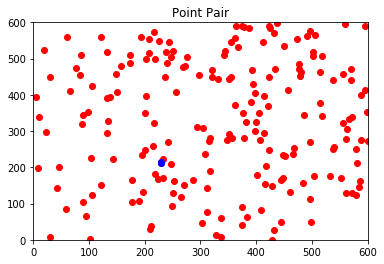

In [6]:
import random
import numpy
import math
import time
import matplotlib.pyplot as plt
 
#分治法求解最近点对问题
n = 200
minimum = float("inf")
point = [(random.randint(0, 3*n), random.randint(0, 3*n)) for i in range(0, n)] # 随机生成n个坐标

closest_pair = {}
buff = {}

point.sort() # 将所有的点按照x的值排序
 
# 计算点之间的距离
def get_distance(a, b):
    # print(a,b)
    distance = math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    if distance in buff:
        buff[distance].append((a, b))  # 将距离为distance的点对添加一对
    else:
        buff[distance] = [(a, b)]
    return distance
 
# 判断temp是否是最小值
def judge_minimum(temp):
    global minimum
    global buff
    if temp not in buff:
        return minimum
    if minimum < temp:
        pass
    elif minimum == temp:
        for i in range(0, len(buff[temp])):
            closest_pair[minimum].append(buff[temp][i])
    else:
        minimum = temp
        closest_pair.clear()
        closest_pair[temp] = buff[temp][:]
    return minimum
 
# 计算左右两边的最小距离
def min_between(point, left, mid, right, minimum):
    global buff, closest_pair
    for i in range(left, mid):
        if abs(point[i][0]-point[mid][0]) <= minimum:
            for j in range(mid, right):
                if abs(point[i][0]-point[j][0]) <= minimum and abs(point[i][1]-point[j][1]) <= minimum:
                    get_distance(point[i], point[j])
    if len(buff) > 0:
        buff = sorted(buff.items(), key=lambda buff: buff[0])
        temp = buff[0][0]
        buff = dict(buff)
    else:
        temp = float("inf")
    return temp
 
# 分治划分
def divide(point, left, right):
    global minimum, buff
    if right-left < 2:     # left,right 为数组下标
        return float('inf')
    elif right-left == 2:
        return get_distance(point[left], point[left+1])
    else:   # 分治划分到区域内只剩下两个点
        mid = int((left+right)/2)
        min_left = divide(point, left, mid)
        minimum = judge_minimum(min_left)  # 判断min
        buff.clear()
 
        min_right = divide(point, mid, right)
        minimum = judge_minimum(min_right)
        buff.clear()
 
        temp = min_between(point, left, mid, right, minimum)
        minimum = judge_minimum(temp)
        buff.clear()
 
        return min(min_left, min_right, temp) # 返回 左侧，右侧，横跨分割线的最小距离
 

divide(point, 0, len(point))
 
print("\n"+"最接近点对是:",
      closest_pair[minimum], "	点对间距离为:", minimum)

## 演示二分搜索树
- 可视化

In [10]:
import turtle
import random
class Node:
    '''定义节点'''
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
 
    def __repr__(self):
        return 'TreeNode({})'.format(self.val)


class BST:
    def __init__(self):
        self.root = None  # 根节点
        self.count = 0    # 节点个数

    def size(self):
        '''返回节点个数'''
        return self.count

    def is_empty(self):
        '''二分搜索树是否为空'''
        return self.count == 0

    def insert(self, item):
        '''
        调用_insert函数添加元素item,
        返回新二分搜索树的根节点
        '''
        self.root = self._insert(self.root, item)

    def is_contain(self, item):
        '''查看该二分搜索树中是否包含某个元素'''
        return self._contain(self.root, item)

    def _insert(self, node, item):
        '''递归实现添加元素'''

        # 如果此节点为空，则将元素添加到此节点
        if node is None:
            self.count += 1
            return Node(item)
        # 传入的值若小于此节点值，则应放入该节点的左子树中
        if item < node.val:  
            node.left = self._insert(node.left, item)
        # 传入的值若大于此节点值，则应放入该节点的右子树中
        elif item > node.val:
            node.right = self._insert(node.right, item)
        # 传入的值若等于此节点值，则不做事情
        else:
            pass
        return node

    def _contain(self, node, item):
        '''递归查找是否包含某个元素'''

        # 当前传入节点为空，未找到该元素
        if node is None:
            return False
        # 等于当前节点值，找到了该元素
        if item == node.val:
            return True
        # item小于当前节点值，则继续在左子树中查找
        elif item < node.val:
            return self._contain(node.left, item)
        # item大于当前节点值，则继续在右子树中查找
        else:
            return self._contain(node.right, item)

    def breadth_travel(self):
        '''广度遍历'''
        queue = [self.root]
        while queue:
            cur_node = queue.pop(0)
            print(cur_node.val, end=' ')
            if cur_node.left is not None:
                queue.append(cur_node.left)
            if cur_node.right is not None:
                queue.append(cur_node.right)

                
def drawtree(root):
    def height(root):
        return 1 + max(height(root.left), height(root.right)) if root else -1
 
    def jumpto(x, y):
        t.penup()
        t.goto(x, y)
        t.pendown()
 
    def draw(node, x, y, dx):
        if node:
            t.goto(x, y)
            jumpto(x, y - 20)
            t.write(node.val, align='center', font=('Arial', 9, 'normal'))
            draw(node.left, x - dx, y - 60, dx / 2)
            jumpto(x, y - 20)
            draw(node.right, x + dx, y - 60, dx / 2)
 
    t = turtle.Turtle()     
    t.speed(0)     
    turtle.delay(0)      
    h = height(root)    
    jumpto(0, 30 * h)     
    draw(root, 0, 30 * h, 40 * h)         
    t.hideturtle()       
    turtle.mainloop()      
        

if __name__ == '__main__':    
    tree = BST()
    n = int(input("请输入节点个数"))
    i=0
    while i < n:
        tree.insert(random.randint(1, 100))
        i = i + 1     
    drawtree(tree.root)
    m = int(input("请输入要查找的值"))
    print('是否存在', m, ":", tree.is_contain(m))

请输入节点个数 10
请输入要查找的值 46


是否存在 46 : True


### 求二项式系数（杨辉三角）
- 把第k行的系数存储在队列中
- 依次出队k层的系数(没行最后一个1不出队),并推算k+1层系数添加到队尾,最后在队尾添加一个1,便变成k+1行

In [20]:
from collections import deque
def xishu():
    N = [1] #先把第一行给定义好
    for i in range(10):  #打印10行
#从这里开始我们就要把list转换为一个剧中的字符串打印出来
        L = N.copy()   #我们需要吧N复制给L,而不能直接L = N，因为这样L和N会在同一个地址，后续算法就会出错
        for j in range(len(L)):   #遍历和转化
            temp = str(L[j])
            L[j] = temp
        l = ' '.join(L).center(50)  #组合和剧中一起写
        print(l)      #这里就是打印l了
        N.append(0)   #因为复制之后L是L，N是N，所以我们还是继续在N末尾加0
        N = [N[k] + N[k-1] 
             for k in range(i+2)]

xishu()

                        1                         
                       1 1                        
                      1 2 1                       
                     1 3 3 1                      
                    1 4 6 4 1                     
                  1 5 10 10 5 1                   
                 1 6 15 20 15 6 1                 
               1 7 21 35 35 21 7 1                
              1 8 28 56 70 56 28 8 1              
           1 9 36 84 126 126 84 36 9 1            


### 判定一个序列是否为另一个序列的子序列
- s = “abc”, t = “ahbgdc” 返回 true.

- s = “axc”, t = “ahbgdc” 返回 false

In [21]:
def isSubsequence(s: str, t: str) -> bool:
    end = len(t)
    start = 0
    for i in s:
        if start >= end:
            return False
        if i not in t[start:end]:
            return False
        else:
            start = t.index(i,start,end) + 1
    return True
       
s = input("输入短字符串")
t = input("输入长字符串")
isSubsequence(s , t)

输入短字符串 234dhh
输入长字符串 fhfgj


False

###  求最长公共子序列
- asdfghjkl   和  qsedrftgyhujik   的最长公共子序列  为 sdfgh
![blockchain](zixulie.png)

In [22]:
# 递归方法
def lcs(a, b):
    lena = len(a)
    lenb = len(b)
    c = [[0 for i in range(lenb + 1)] for j in range(lena + 1)]
    flag = [[0 for i in range(lenb + 1)] for j in range(lena + 1)]
    for i in range(lena):
        for j in range(lenb):
            if a[i] == b[j]:
                c[i + 1][j + 1] = c[i][j] + 1
                flag[i + 1][j + 1] = 'ok'
            elif c[i + 1][j] > c[i][j + 1]:
                c[i + 1][j + 1] = c[i + 1][j]
                flag[i + 1][j + 1] = 'left'
            else:
                c[i + 1][j + 1] = c[i][j + 1]
                flag[i + 1][j + 1] = 'up'
    return flag
 
def printLcs(flag, a, i, j, d):
    if i == 0 or j == 0:
        return
    if flag[i][j] == 'ok':
        printLcs(flag, a, i - 1, j - 1, d)
        print(a[i - 1], end='')
        d.append(a[i - 1])
    elif flag[i][j] == 'left':
        printLcs(flag, a, i, j - 1, d)
    else:
        printLcs(flag, a, i - 1, j, d)
        
a = input("输入字符串A")
b = input("输入字符串B")
d = []
flag = lcs(a, b)
printLcs(flag, a, len(a), len(b), d)
print('\n', d, '\n', len(d))

输入字符串A qrewyrtjgfb
输入字符串B dsgtryag


ryg
 ['r', 'y', 'g'] 
 3


### 格路问题 可视化
![blockchain](geluwenti.png)

In [12]:
import turtle
def short_path(mat):
    i = len(mat)    # 行数
    j = len(mat[0])  # 列数
    # 建立一个标志矩阵  代表着我们当前往哪里走
    sign = [[None for k in range(j)] for m in range(i)]
    sign[0][0] = '起点'
    for k in range(1, j):
        mat[0][k] += mat[0][k-1]
        sign[0][k] = '向左'
    for m in range(1, i):
        mat[m][0] += mat[m-1][0]
        sign[m][0] = '向上'
    for k in range(1, j):
        for m in range(1, i):
            temp = min(mat[m-1][k], mat[m][k-1])
            if temp == mat[m-1][k]:
                sign[m][k] = '向上'
            if temp == mat[m][k-1]:
                sign[m][k] = '向左'
            mat[m][k] += temp
    for item in sign:
        print(item)
 
    return mat, sign
 
def print_path(sign):
 
    path = []
    i = len(sign) -1
    j = len(sign[0])-1
    while i > 0 and j > 0:
        if sign[i][j] == '向左':
            j -= 1
            path.append('向左')
        if sign[i][j] == '向上':
            i -= 1
            path.append('向上')
    path.append('起点')
    return path

def drawpath(matrix, path):   
    turtle.setup(700, 550, 200, 200)
    turtle.goto(250, 0)
    turtle.goto(250, 250)
    turtle.goto(0, 250)
    turtle.goto(0, 0)
    i = 1
    while i < 5:
        turtle.penup()
        turtle.goto(i * 50, 0)
        turtle.pendown()
        turtle.goto(i * 50, 250)
        i = i + 1
    turtle.penup()
    turtle.goto(0, 0)
    j = 1
    while j < 5:
        turtle.penup()
        turtle.goto(0, j * 50)
        turtle.pendown()
        turtle.goto(250, j * 50)
        j = j + 1
    turtle.penup()
    turtle.goto(0, 0)
    i = j = 0
    while i < 5:
        while j < 5:
            turtle.goto(j * 50 + 25, i * 50 + 25)
            turtle.pendown
            turtle.write(matrix[i][j])
            turtle.penup
            j = j + 1
        j = 0
        i = i + 1
    turtle.hideturtle()
    turtle.pensize(1)
    turtle.pencolor("purple")
    turtle.pendown()
    m = n = 0;
    for k in path:
        if k == '向左':
            m = m + 1
            turtle.goto(225 - m * 50, 225 - n * 50)
        if k == '向上':
            n = n + 1
            turtle.goto(225 - m * 50, 225 - n * 50)
    turtle.done()

if __name__ == '__main__':
    matrix = [[2, 3, 1, 4, 4],
              [2, 1, 4, 5, 3],
              [3, 0, 2, 3, 6],
              [4, 3, 2, 0, 8],
              [4, 2, 0, 2, 1]]
    mat, sign = short_path(matrix)
 
    # 打印路径
    path = print_path(sign)
    print("从终点回起点的路径:", path)
    drawpath(matrix, path) 

['起点', '向左', '向左', '向左', '向左']
['向上', '向左', '向左', '向左', '向左']
['向上', '向上', '向左', '向左', '向左']
['向上', '向上', '向上', '向左', '向左']
['向上', '向上', '向上', '向左', '向左']
从终点回起点的路径: ['向左', '向左', '向上', '向上', '向左', '向上', '向左', '向上', '起点']


### 矩阵链式乘积
![blockchain](juzhen.png)

In [25]:
def matrix_order(matrix, n):
    bignum = 999999999
    cost = [] # 计算量
    s = [] # 保存分割的位置
    for i in range(n+1):  # 赋值计算量最大
        cost.append([])
        s.append([])
        for j in range(n+1):
            cost[i].append(bignum)
            s[i].append(-1)
    for i in range(n+1):
        cost[i][i] = 0
        s[i][i] = i
 
    for l in range(1,n+2):
        for i in range(0,n+1-l):
            j = i + l
            #cost[i][j] = bignum
            for k in range(i,j):
                c = cost[i][k]+cost[k+1][j]+matrix[i]*matrix[k+1]*matrix[j+1] # 计算在当前位置分割的最新消耗值
                if c < cost[i][j]: # 刚计算出的值比i，j间已计算的消耗值小，取最小值
                    cost[i][j] = c
                    s[i][j] = k
    return s
 
def print_order(i,j,s):
    if i == j:
        print(s[i][j],end="")
    else:
        print("(",end="")
        print_order(i,s[i][j],s)
        print_order(s[i][j]+1,j,s)
        print(")",end="")

matrix = []
n = int(input("输入矩阵个数"))
i = 0
while i <= n+1:
    matrix.append(int(input("请输入矩阵阶数")))
    i = i + 1
s = matrix_order(matrix, n)
print_order(0,n,s)

输入矩阵个数 3
请输入矩阵阶数 2
请输入矩阵阶数 4
请输入矩阵阶数 2
请输入矩阵阶数 4
请输入矩阵阶数 2


((01)(23))

### Floyd 方法求所有点之间的最短路径
- 对输入的无向图，以及无向图中的节点和边通过floyd算法求出图中任意两个节点之间的最短路径长度以及最短路径
- 输入的第一行表示：无向图中的节点数num_node和边数num_vertice
- 假设无向图中的节点编号：1，2，…… num_node,后面的num_vertice行表示无向图中每条边的起始顶点，终止顶点和边的权重
```
输入：
5 6
1 2 2
1 3 9
1 5 4
2 3 3
2 4 1
4 5 2
```
![blockchain](floyd.png)

In [1]:
def find_path(prior_matrix,i,j): # 从路径矩阵中找寻i到j经过的路径
    '''
    prior_matrix 中记录的是从i到j点，经过路径的最后一个节点，如果prior_matrix[i][j]=k的话，就是i➡k➡j为最短路径，
    需要再继续找prior_matrix[i][k]的值，直到prior_matrix[i][m]=m
    
    '''
    if prior_matrix[i][j]==j:
        return 'node%d'%(i+1)+'->'+'node%d'%(j+1)
    else:
        return find_path(prior_matrix,i,prior_matrix[i][j])+find_path(prior_matrix,prior_matrix[i][j],j)

if __name__=='__main__':
    line1=list(map(int,input().split())) # 输入无向图的信息
    num_node=line1[0] # 节点数
    num_vertice=line1[1] # 边数
 
    vertice_list=[]
    for i in range(num_vertice): # 构建路径耗散值的矩阵
        temp_line=list(map(int,input().split()))
        vertice_list.append(temp_line)
 
    distance_matrix=[[float('inf') for i in range(num_node)] for j in range(num_node)] # 初始化最短路径，n行n列，n为节点个数
 
    for i in range(num_node): # 对角线为0
        distance_matrix[i][i]=0
 
    for vertice in vertice_list: # 根据节点间距离初始化距离矩阵，无向图的距离路径矩阵为对称矩阵
        distance_matrix[vertice[0]-1][vertice[1]-1]=vertice[2]
        distance_matrix[vertice[1] - 1][vertice[0] - 1] = vertice[2]
 
    #初始化路径记录矩阵，prior_matrix记录从所有初始节点到终止节点的最短路径所需要经过的上一个节点
    prior_matrix=[[0 for i in range(num_node)] for j in range(num_node)]  
 
    for p in range(num_node): # 路径矩阵填入值进行初始化
        for q in range(num_node):
            prior_matrix[p][q]=q

    for k in range(num_node):  # 将无向图中的当前节点加入进来，判断以当前节点为中介节点后，最短路径是否发生变换
        for i in range(num_node):
            for j in range(num_node):
                if distance_matrix[i][j]>distance_matrix[i][k]+distance_matrix[k][j]: # 把k加进来，更新距离矩阵中的数值
                    distance_matrix[i][j]=distance_matrix[i][k]+distance_matrix[k][j]
                    prior_matrix[i][j]=prior_matrix[i][k] # 更新从i到j的路径
 
    print('各个顶点对之间的最短路径：')
 
    for i in range(num_node):
        print('\n')
        for j in range(i+1,num_node):
            temp_route=[]
            temp_route=find_path(prior_matrix,i,j) # 从路径矩阵中找寻i到j经过的路径
 
            if temp_route.count('>')==1:#如果从初始节点i到终止节点j并不需要任何的中间节点，则直接输出字符串
                display_line=temp_route
            else:
                output_str=temp_route.split('->')
                display_line=''
                display_line+='node%d'%(i+1)
                for t in range(1, len(output_str) - 1):
                    # output_str[t] = output_str[t][0:int(len(output_str) / 2)]
                    display_line+='->n'+output_str[t][0:int(len(output_str[t]) / 2)]
                display_line += '->node%d' % (j + 1)
 
            print('node%d->node%d: distance:%d' % (i + 1, j + 1, distance_matrix[i][j]), 'route:', display_line)
    

 5 6
 1 2 2
 1 3 9
 1 5 4
 2 3 3
 2 4 1
 4 5 2


各个顶点对之间的最短路径：


node1->node2: distance:2 route: node1->node2
node1->node3: distance:5 route: node1->nnode2->node3
node1->node4: distance:3 route: node1->nnode2->node4
node1->node5: distance:4 route: node1->node5


node2->node3: distance:3 route: node2->node3
node2->node4: distance:1 route: node2->node4
node2->node5: distance:3 route: node2->nnode4->node5


node3->node4: distance:4 route: node3->nnode2->node4
node3->node5: distance:6 route: node3->nnode2->nnode4->node5


node4->node5: distance:2 route: node4->node5




### 哈夫曼压缩
![blockchain](hafuman.png)

In [27]:
import tkinter.filedialog
# 自定义异常
class Inputerror(Exception):
    def __init__(self, messages):
        super().__init__(messages)


def sort_tuple(dist):
    # 传入字典，按照键大小顺序重排序，一个排序的过程
    return sorted(dist.items(), key=lambda x: x[1], reverse=True)


def get_coding_schedule(end1, end2, sort_list, code_schedule):
    # 传入 末端2位字符组 频数 序列列表(剔除末端字符) 哈夫曼编码表
    '''
    哈夫曼表构造过程
        传入 end1 作为右子树，end2 作为左子树
        分别判断 end1 和 end2 的字符长度，如果长度为 1 说明该字符是叶子节点，否则说明该字符是分支节点
            如果 end1 是叶子节点，则设置编码值为 "1"，如果 end2 是叶子节点，则设置编码值为 "0"
            如果 end1 是分支节点，则根据分支节点的字符串进行遍历，为每一个子叶编码值都添加前缀字符 "1"，如果 end2 是分支节点，则根据分支节点的字符串进行遍历，为每一个子叶编码值都添加前缀字符 "0"
        在 sort_list 中添加由 end1 和 end2 构成的分支节点信息，结点信息包含所有子叶字符，所有子叶累计频数
    '''
    if len(end1[0]) == 1:
        code_schedule.setdefault(end1[0], '1')
    else:
        for k in end1[0]:
            code_schedule[k] = '1' + code_schedule[k]
    if len(end2[0]) == 1:
        code_schedule.setdefault(end2[0], '0')
    else:
        for k in end2[0]:
            code_schedule[k] = '0' + code_schedule[k]
    sort_list.append((end2[0] + end1[0], end1[1] + end2[1]))
    return code_schedule


def get_keys(dict, value):
    # 传入字典，值，获取对应的键
    for k, v in dict.items():
        if v == value:
            return k


def check_binary(input_data):
    # 检查文件编码，ASCII码超出255的字符替换为空格
    output_data = ''
    for word_index in range(len(input_data)):
        if ord(input_data[word_index]) >= 256:
            output_data += ' '
        else:
            output_data += input_data[word_index]
    return output_data


def compress(file_name):
    import os
    import six
    # 打开文件
    f = open(file_name, 'r')

    # 读取信息
    file_data = check_binary(f.read())
    f.close()

    # 统计各字符的频数，保存在字典 char_freq 中
    char_freq = {}
    for word in file_data:
        char_freq.setdefault(word, 0)
        char_freq[word] += 1

    # 编码哈夫曼树
    # 初始 字符--频数 列表
    sort_list = sort_tuple(char_freq)
    # 哈夫曼编码表
    code_schedule = {}
    # 不断重排序，更新哈夫曼编码表及树节点信息
    for i in range(len(sort_list) - 1):
        # 排序
        sort_list = sort_tuple(dict(sort_list))
        # 构造树
        code_schedule = get_coding_schedule(sort_list.pop(), sort_list.pop(), sort_list, code_schedule)
        
    for j in code_schedule:
        print(j,"  :  ",code_schedule[j])
    
    # 文本信息转哈夫曼码
    # 夫曼 0-1 编码转码 + 正文文本
    code = ''.join(list(code_schedule.values()))
    for word in file_data:
        code += code_schedule[word]
    # 不足 8 位补 0，记录在 code_sup 中
    code_sup = 8 - len(code) % 8
    code += code_sup * '0'

    # 创建压缩文件
    f = open(os.path.splitext(file_name)[0] + '.qlh', 'wb')
    # 写入补 0 信息
    f.write(six.int2byte(code_sup))
    # 写入哈夫曼编码表（总长度+每一个编码长度+每一个编码对应的字符+转码信息）
    # 码表总长度（字符个数，与指针读取定位有关，分割码表与正文）
    f.write(six.int2byte(len(code_schedule)))
    # 储存每一个哈夫曼编码的位长
    for v in code_schedule.values():
        f.write(six.int2byte(len(v)))
    # 储存每一个哈夫曼编码配对字符        字符 ==> ASCII 码
    for k in code_schedule.keys():
        f.write(six.int2byte(ord(k)))
    # 以 8 为长度单位，将 0-1 字符转为对应的十进制数，映射为 ASCII 符号，写入正文文本
    for i in range(len(code) // 8):
        f.write(six.int2byte(int(code[8 * i:8 + 8 * i], 2)))
    # 关闭文件
    f.flush()
    f.close()
    print('压缩完成', file_name, '>>', os.path.splitext(file_name)[0] + '.qlh')


def decompress(file_name):
    import os
    # 打开文件
    f = open(file_name, 'rb')
    # 读取信息
    file_data = f.read()
    f.close()

    # 分割信息
    # 获取补 0 位数
    code_sup = file_data[0]
    # 获取码表长度
    code_schedule_length = file_data[1]
    # 指针跳过 补0+码长+码符
    pointer = 2 * code_schedule_length + 2
    # 获取码表中每一个编码的长度
    code_word_len = [file_data[2 + i] for i in range(code_schedule_length)]
    # 3.5 编码表中字符长度总和，用于切割码表与正文
    sum_code_word_len = sum(code_word_len) // 8 + 1 if sum(code_word_len) % 8 != 0 else sum(code_word_len) // 8

    # 还原码表
    # 码表转译
    code_schedule_msg = ''
    for i in range(sum_code_word_len):
        code_schedule_msg += '0' * (10 - len(bin(file_data[pointer + i]))) + bin(file_data[pointer + i])[2:]
    # 初始化指针
    pointer = 0
    # 创建码表
    code_schedule = {}
    for i in range(code_schedule_length):
        code_word = chr(file_data[code_schedule_length + 2 + i])  # 码符
        code_schedule[code_word] = code_schedule_msg[pointer:pointer + code_word_len[i]]  # 码符码文匹配，还原码表
        pointer += code_word_len[i]

    # 提取正文
    code = code_schedule_msg[pointer:]
    pointer = 2 * code_schedule_length + 2 + sum_code_word_len
    for number in file_data[pointer:]:
        code += '0' * (10 - len(bin(number))) + bin(number)[2:]
    # 删去补0
    code = code[:-code_sup]

    # 本转译
    pointer = 0  # 指针归零
    # 初始化文本
    letter = ''
    # 限制最大搜索长度，提高效率
    max_length = max([len(list(code_schedule.values())[i]) for i in range(len(code_schedule.values()))])
    while pointer != len(code):
        for i in range(max_length):
            if code[pointer:pointer + i + 1] in code_schedule.values():
                letter += get_keys(code_schedule, code[pointer:pointer + i + 1])
                pointer += i + 1
                break

    # 创建解压文件
    f = open(os.path.splitext(file_name)[0] + '.txt', 'w+')
    f.write(letter)
    print('解压完成', file_name, '>>', os.path.splitext(file_name)[0] + '.txt')

if __name__ == '__main__':
    file_name = tkinter.filedialog.askopenfilenames()
    for file in file_name:
        compress(file)
        #decompress(file)

8   :   11110111
/   :   11110110
[   :   1111010
x   :   1010011
m   :   1010010
z   :   1111001
.   :   1111000
4   :   0101101
q   :   0101100
t   :   101000
9   :   101011
3   :   101010
    :   010111
7   :   000111
y   :   000110
w   :   001001
k   :   001000
a   :   000101
r   :   000100
o   :   11111
2   :   10011
j   :   10010
c   :   01010
s   :   01001
u   :   01000
l   :   00111
p   :   00110
e   :   00101
f   :   00001
h   :   00000
v   :   1110
n   :   1101
;   :   1100
i   :   1011
b   :   1000
g   :   0111
d   :   0110
压缩完成 C:/Users/mi/Desktop/suanfa/1.txt >> C:/Users/mi/Desktop/suanfa/1.qlh


### n 皇后问题  
- 回溯法
- 条件1：同行同列不能放置两个或大于两个皇后
- 条件2：皇后的斜线上不能存在皇后
- 所有可能性全排列
- 利用两条件进行剪枝

In [28]:
def per(lst,s,e): # 满足条件1的全排列过程，结果满足同行同列不能放置两个或大于两个皇后
    if s == e:
        per_result.append(list(lst)) # 将满足条件的排列情况存储
    else:
        for i in range(s,e):
            lst[i],lst[s] = lst[s],lst[i]  #试探
            per(lst,s+1,e)  #递归
            lst[i],lst[s] = lst[s],lst[i]  #回溯

def shear(lst):  #剪枝
    result = 0
    for i in range(len(lst)):
        for j in range(i+1,len(lst)):
            if(abs(lst[j] - lst[i]) == abs(j-i)): # 判断是否在一条斜线上，i，j表示行值，lst[i],lst[j]表示列值，在同一条直线上会差的绝对值相等
                result += 1
    if(result > 0):
        return True
    else:
        return False
    
def stamp(st): #打印
    for i in st:
        for j in range(len(i)):
            a = ("☐"*(i[j]-1)+"★"+"☐"*(len(i)-i[j]))
            print(a,"\t","第{}个皇后放在棋盘的第{}列".format(j+1,i[j]))
        print(" ")#负责空行

if __name__=='__main__':
    per_result = []     #全排列的结果
    num = eval(input("请输入皇后的个数："))
    lst = [i+1 for i in range(num)]
    per(lst,0,num)
    queen_lst = []
    for i in per_result:
        if(shear(i) == False):
            queen_lst.append(i)
    stamp(queen_lst)
    print("共{:d}种可能".format(len(queen_lst)))

请输入皇后的个数： 4


☐★☐☐ 	 第1个皇后放在棋盘的第2列
☐☐☐★ 	 第2个皇后放在棋盘的第4列
★☐☐☐ 	 第3个皇后放在棋盘的第1列
☐☐★☐ 	 第4个皇后放在棋盘的第3列
 
☐☐★☐ 	 第1个皇后放在棋盘的第3列
★☐☐☐ 	 第2个皇后放在棋盘的第1列
☐☐☐★ 	 第3个皇后放在棋盘的第4列
☐★☐☐ 	 第4个皇后放在棋盘的第2列
 
共2种可能


### 着色问题
- 四色定理 每个平面地图都可以只用四种颜色来染色，而且没有两个邻接的区域颜色相同
- 给定无向连通图G和m种不同的颜色。用这些颜色为图G的各顶点着色，每个顶点着一种颜色。
- 是否有一种着色法使G中每条边的2个顶点着不同颜色。
- 回溯法

In [29]:
import numpy as np
def colorjudge(Graph, k, C): #判断相连接的位置的颜色是否一致
    for i in range(len(Graph[k])):
        if Graph[k][i] != 0 and C[k] == C[i]:
            return 0
    return 1
def backtrace(k, C, V, Graph): # 利用回溯寻找着色问题的解个数以及解形式
    global sum
    if k < V:
        for color in range(1, m + 1):
            C[k] = color
            if colorjudge(Graph, k, C):
                backtrace(k + 1, C, V, Graph)
            C[k] = 0
    else:
        print(C)  # 输出解析式
        sum += 1

if __name__=='__main__':
    V = 4 #顶点数
    m = 3 #涂色可供选择的颜色数
    Graph = np.array([[0, 1, 1, 1],   # 邻接矩阵
                  [1, 0, 1, 0],
                  [1, 1, 0, 1],
                  [1, 0, 1, 0]])
    C = np.zeros([4])   # 颜色矩阵
    sum = 0
    backtrace(0, C, V, Graph)
    print("There are %d solutions" % sum)

[1. 2. 3. 2.]
[1. 3. 2. 3.]
[2. 1. 3. 1.]
[2. 3. 1. 3.]
[3. 1. 2. 1.]
[3. 2. 1. 2.]
There are 6 solutions


### 0 1背包
- 有一个背包，他的容量为C。现在有n种不同的物品编号分别为0、1....n-1。其中每一件物品的重量为w(i)，价值为v(i)。
- 问可以向这个背包中放入哪些物品，使得在不超过背包容量的基础上，背包内物品价值最大。
- 动态规划

In [2]:
import numpy as np
n = int(input("请输入物品个数 "))
i = 0
weight = []
value = []
while i < n:
    print("第",i+1,"件物品")
    weight.append(int(input("请输入物品的重量")))
    value.append(int(input("请输入物品的价值")))
    i = i + 1
weight_most = int(input("请输入背包的总重量"))
def bag_0_1(weight,value,weight_most):
    num = len(weight)
    weight.insert(0,0)   #前0件要用
    value.insert(0,0)    #前0件要用
    bag=np.zeros((num+1,weight_most+1),dtype=np.int32)#下标从零开始
    for i in range(1,num+1):   # 尝试放入第i件
        for j in range(1,weight_most+1): # 在背包总容量为j的情况下
            if weight[i]<=j:
                bag[i][j]=max(bag[i-1][j-weight[i]]+value[i],bag[i-1][j]) # 求此时背包的最大价值
            else:
                bag[i][j]=bag[i-1][j]
    print("矩阵为\n",bag)
    return bag[-1,-1]
 
result=bag_0_1(weight,value,weight_most)
print("\n背包装物品最大价值为",result)

请输入物品个数  4


第 1 件物品


请输入物品的重量 2
请输入物品的价值 3


第 2 件物品


请输入物品的重量 1
请输入物品的价值 4


第 3 件物品


请输入物品的重量 3
请输入物品的价值 3


第 4 件物品


请输入物品的重量 5
请输入物品的价值 2
请输入背包的总重量 10


矩阵为
 [[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  3  3  3  3  3  3  3  3]
 [ 0  4  4  7  7  7  7  7  7  7  7]
 [ 0  4  4  7  7  7 10 10 10 10 10]
 [ 0  4  4  7  7  7 10 10 10 10 10]]

背包装物品最大价值为 10


### 最大团问题
- 对搜索树进行剪枝
- 回溯法搜索
- 最大团：G的最大团是指G中所含顶点数最多的团，最大团中，任何节点都与其他剩余节点相连。

![blockchain](zuidatuan.png)

In [34]:
import copy
def isConnected(u, v):  # 判断u，v两节点是否相连
    if u == -1 or v == -1:  #虚拟节点-1与所有的节点都相连
        return 1
    edge_points = E[u] 
    if v in edge_points:  # 如果v等于E[u]
        return 1
    else:
        edge_points = E[v]
        if u in edge_points: #如果u等于E[v]
            return 1
        else:
            return 0

def isConnectedAll(clique, v):  # 判断v是否和clique中所有节点相连
    flag = 1
    for i in clique:
        if not isConnected(i, v):
            flag = 0
            break
    return flag


class Step:
    def __init__(self):
        self.maxClique = []  # 计算完毕时的解集,是每个阶段的实际结果
        self.cliqueList = []  # 计算时用的解集
        self.maxnC = 0

    def maxCliqn(self):  # 计算当前阶段最大值
        max = 0
        for clique in self.cliqueList:
            if max < len(clique):
                max = len(clique)
        return max

    def isNew(self, clique):  # 判断一个解组合是否已经存在于该阶段的实际解集中
        for cl in self.maxClique:  # 针对每个已存入的解集进行判断
            diff = list(set(clique).difference(set(cl)))  # 取解的差集
            if (len(diff)):
                continue  # 差集不为空，说明不同，继续循环
            else:
                return False  # 差集为空,说明有个解完全一样，返回False
        return True

    def updateMaxClique(self):  # 更新当前阶段的最大团数目
        self.maxnC = self.maxCliqn()
        for clique in self.cliqueList:
            if (len(clique) == self.maxnC):
                if self.isNew(clique):
                    self.maxClique.append(clique)


if __name__ == "__main__":
    V = [0, 1, 2, 3, 4]
    E = [[1, 2, 4], [3, 4], [3], [4], []]
    n = len(V)
    solutions = {}
    for i in range(0, n):
        solutions[i] = Step()  # 初始化n个阶段
    for v in V:
        a = []
        a.append(v)
        solutions[0].cliqueList.append(a)
    solutions[0].updateMaxClique()  # 设置初始值

    for i in range(1, n):
        # cliqList= solutions[i-1].maxClique
        preData = solutions[i - 1]
        cliqList = preData.maxClique
        preMax = preData.maxnC
        for clique in cliqList:  # 针对前一阶段的每个clique求解
            for v in V:  # 针对所有的点
                tempclique = copy.deepcopy(clique)  ##必须使用深拷贝
                if not v in tempclique:  # 如果该clique没有包含v
                    if isConnectedAll(tempclique, v):  # 如果v与clique的所有点相连
                        tempclique.append(v)  # 加入该点
                        solutions[i].cliqueList.append(tempclique)  # 加入这个解
        solutions[i].updateMaxClique()
        if not len(solutions[i].maxClique):  # 如果已经找不到更多的点加入团，那么后面的也不用计算了（比如找不到4个的团，那么5个的团也没必要再尝试计算）
            break

    for i in range(0, n):
        print("step" + str(i) + ": " + str(solutions[i].maxClique))

    for i in range(n - 1, -1, -1):
        solution = solutions[i]
        if len(solution.maxClique):
            maxn = solution.maxnC
            print("最大团数目是" + str(maxn) + "个")
            print("最大团为:")
            print(solution.maxClique)
            break

step0: [[0], [1], [2], [3], [4]]
step1: [[0, 1], [0, 2], [0, 4], [1, 3], [1, 4], [2, 3], [3, 4]]
step2: [[0, 1, 4], [1, 3, 4]]
step3: []
step4: []
最大团数目是3个
最大团为:
[[0, 1, 4], [1, 3, 4]]
